In [85]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import scikit_posthocs as sp

In [105]:
data = pd.read_csv("./ex14-11.txt")
data.columns = ['Ratings', 'Sweetener', 'MilkFat', 'Air']
data.head()

,Ratings,Sweetener,MilkFat,Air
0,23,0.12,0.1,0.05
1,24,0.12,0.1,0.05
2,25,0.12,0.1,0.05
3,36,0.12,0.1,0.10
4,35,0.12,0.1,0.10


In [88]:
model_str = (('Ratings ~ C({0}) + C({1}) + C({2}) + ' +
            'C({0}):C({1}) + C({0}):C({2}) + C({1}):C({2}) + C({0}):C({1}):C({2})').
            format('Sweetener', 'MilkFat', 'Air'))

In [89]:
model_str

'Ratings ~ C(Sweetener) + C(MilkFat) + C(Air) + C(Sweetener):C(MilkFat) + C(Sweetener):C(Air) + C(MilkFat):C(Air) + C(Sweetener):C(MilkFat):C(Air)'

In [101]:
from statsmodels.formula.api import ols
model = ols(model_str, data=data).fit()
print(model.params)

Intercept                                                 24.000000
C(Sweetener)[T.0.16]                                       1.000000
C(MilkFat)[T.0.12]                                         3.000000
C(MilkFat)[T.0.15]                                         6.666667
C(Air)[T.0.1]                                             11.666667
C(Air)[T.0.15]                                             2.333333
C(Sweetener)[T.0.16]:C(MilkFat)[T.0.12]                    8.333333
C(Sweetener)[T.0.16]:C(MilkFat)[T.0.15]                    4.666667
C(Sweetener)[T.0.16]:C(Air)[T.0.1]                         0.333333
C(Sweetener)[T.0.16]:C(Air)[T.0.15]                       -0.666667
C(MilkFat)[T.0.12]:C(Air)[T.0.1]                          -1.666667
C(MilkFat)[T.0.15]:C(Air)[T.0.1]                          -8.333333
C(MilkFat)[T.0.12]:C(Air)[T.0.15]                          5.333333
C(MilkFat)[T.0.15]:C(Air)[T.0.15]                         -7.000000
C(Sweetener)[T.0.16]:C(MilkFat)[T.0.12]:C(Air)[T

In [109]:
anova_table = sm.stats.anova_lm(model, typ=1).replace(np.nan, '', regex=True)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Sweetener),1.0,50.074074,50.074074,15.2768,0.000393351
C(MilkFat),2.0,261.333333,130.666667,39.8644,7.43872e-10
C(Air),2.0,436.000000,218.000000,66.5085,8.14142e-13
C(Sweetener):C(MilkFat),2.0,11.259259,5.629630,1.71751,0.193895
C(Sweetener):C(Air),2.0,78.814815,39.407407,12.0226,0.000100193
C(MilkFat):C(Air),4.0,355.666667,88.916667,27.1271,1.98247e-10
C(Sweetener):C(MilkFat):C(Air),4.0,46.185185,11.546296,3.5226,0.0158701
Residual,36.0,118.000000,3.277778,,


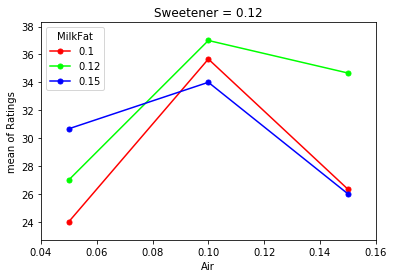

In [97]:
from statsmodels.graphics.factorplots import interaction_plot

data_s_1 = data[data['Sweetener'] == 0.12]
interaction_plot(x=data_s_1['Air'], trace=data_s_1['MilkFat'], response=data_s_1['Ratings'],
                     ms=10)
plt.title('Sweetener = 0.12')
plt.show()

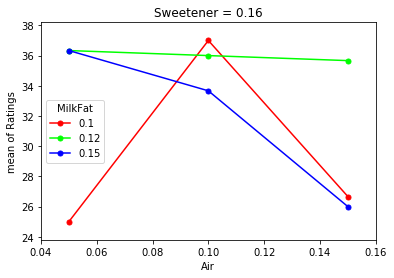

In [98]:
data_s_2 = data[data['Sweetener'] == 0.16].reset_index()
interaction_plot(x=data_s_2['Air'], trace=data_s_2['MilkFat'], response=data_s_2['Ratings'],
                     ms=10)
plt.title('Sweetener = 0.16')
plt.show()